<a href="https://colab.research.google.com/github/Hanniix22/dataviz2025/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Visualize_Data_Comparison_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [16]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [17]:
path = '/content/drive/MyDrive/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv'

In [18]:
data = pd.read_csv(path)
data.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


# Quiz 12 สร้างตารางที่แสดงความถี่ของจำนวน case ที่จับโดยตำรวจเชื้อชาติต่างๆ

In [19]:
compared_police_eth = data.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth

,Officer-defined ethnicity,Type
0,Asian,81
1,Black,64
2,Other,9
3,White,199


## Bar chart (กราฟแท่ง) (กราฟผลไม้)

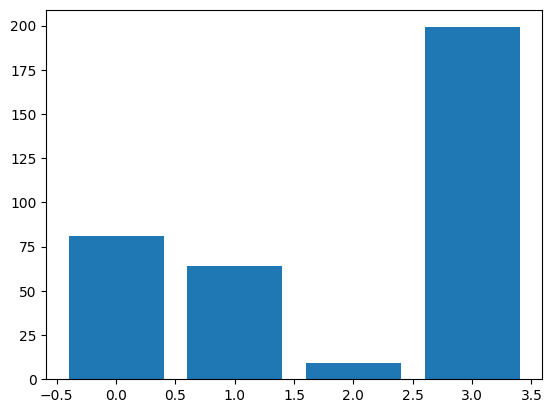

In [20]:
plt.bar(compared_police_eth.index, compared_police_eth['Type']);

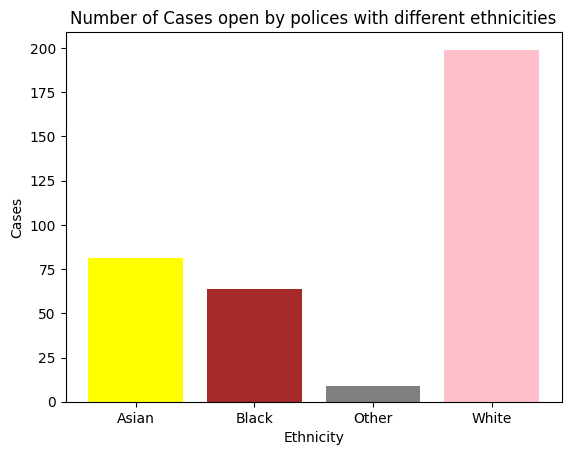

In [21]:
plt.bar(compared_police_eth['Officer-defined ethnicity'], compared_police_eth['Type'], color=['yellow', 'brown', 'grey', 'pink'])
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.title('Number of Cases open by polices with different ethnicities');

# Stacked barchart

In [23]:
data1 = pd.read_csv('/content/drive/MyDrive/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Data/2025-02/2025-02-bedfordshire-stop-and-search.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Data/2025-03/2025-03-bedfordshire-stop-and-search.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Data/2025-04/2025-04-bedfordshire-stop-and-search.csv')

In [24]:
compared_police_eth1 = data1.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth2 = data2.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth3 = data3.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')
compared_police_eth4 = data4.groupby('Officer-defined ethnicity')['Type'].count().reset_index().sort_values(by='Type')

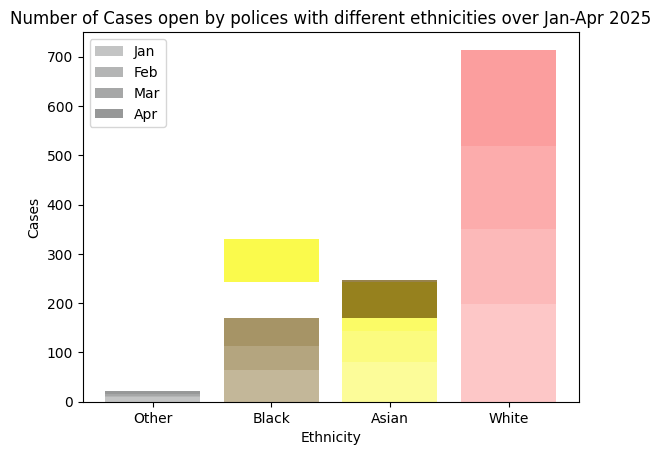

In [25]:
plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.4], [107/255,77/255,0,0.4], [249/255,249/255,0,0.4], [250/255,117/255,117/255,0.4]]
        ,label='Jan')
plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type']
        , bottom = compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.5], [107/255,77/255,0,0.5], [249/255,249/255,0,0.5], [250/255,117/255,117/255,0.5]]
        , label='Feb')
plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']
        , color=[[107/255,108/255,109/255,0.6], [107/255,77/255,0,0.6], [249/255,249/255,0,0.6], [250/255,117/255,117/255,0.6]]
        , label='Mar')
plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']+ compared_police_eth3['Type']
        , color=[[107/255,108/255,109/255,0.7], [107/255,77/255,0,0.7], [249/255,249/255,0,0.7], [250/255,117/255,117/255,0.7]]
        , label='Apr')
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by polices with different ethnicities over Jan-Apr 2025');

In [27]:
data1 = pd.read_csv('/content/drive/MyDrive/Data/2025-01/2025-01-bedfordshire-stop-and-search.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Data/2025-02/2025-02-bedfordshire-stop-and-search.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Data/2025-03/2025-03-bedfordshire-stop-and-search.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Data/2025-04/2025-04-bedfordshire-stop-and-search.csv')

In [28]:
compared_police_eth1 = data1.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth2 = data2.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth3 = data3.groupby('Officer-defined ethnicity')['Type'].count().reset_index()
compared_police_eth4 = data4.groupby('Officer-defined ethnicity')['Type'].count().reset_index()

In [29]:
def swap_rows(tab, eth1='Asian', eth2='Other'):
    # Find the indices of 'Asian' and 'Other'
    asian_index = tab[tab['Officer-defined ethnicity'] == eth1].index[0]
    other_index = tab[tab['Officer-defined ethnicity'] == eth2].index[0]

    # Get the rows
    asian_row = tab.loc[asian_index].copy()
    other_row = tab.loc[other_index].copy()

    # Swap the rows
    tab.loc[asian_index] = other_row
    tab.loc[other_index] = asian_row

    return tab

In [30]:
compared_police_eth1 = swap_rows(compared_police_eth1)
compared_police_eth2 = swap_rows(compared_police_eth2)
compared_police_eth3 = swap_rows(compared_police_eth3)
compared_police_eth4 = swap_rows(compared_police_eth4)

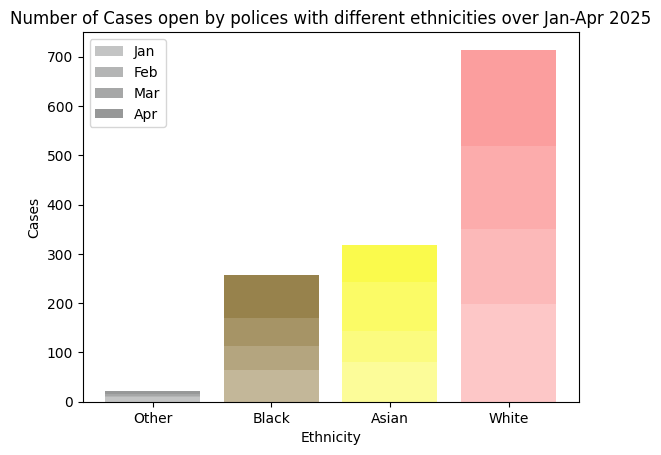

In [31]:
plt.bar(compared_police_eth1['Officer-defined ethnicity'], compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.4], [107/255,77/255,0,0.4], [249/255,249/255,0,0.4], [250/255,117/255,117/255,0.4]]
        ,label='Jan')
plt.bar(compared_police_eth2['Officer-defined ethnicity'], compared_police_eth2['Type']
        , bottom = compared_police_eth1['Type']
        , color=[[107/255,108/255,109/255,0.5], [107/255,77/255,0,0.5], [249/255,249/255,0,0.5], [250/255,117/255,117/255,0.5]]
        , label='Feb')
plt.bar(compared_police_eth3['Officer-defined ethnicity'], compared_police_eth3['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']
        , color=[[107/255,108/255,109/255,0.6], [107/255,77/255,0,0.6], [249/255,249/255,0,0.6], [250/255,117/255,117/255,0.6]]
        , label='Mar')
plt.bar(compared_police_eth4['Officer-defined ethnicity'], compared_police_eth4['Type']
        , bottom = compared_police_eth1['Type'] + compared_police_eth2['Type']+ compared_police_eth3['Type']
        , color=[[107/255,108/255,109/255,0.7], [107/255,77/255,0,0.7], [249/255,249/255,0,0.7], [250/255,117/255,117/255,0.7]]
        , label='Apr')
plt.xlabel('Ethnicity')
plt.ylabel('Cases')
plt.legend()
plt.title('Number of Cases open by polices with different ethnicities over Jan-Apr 2025');

# Group barchart

In [32]:
compared_police_eth1

,Officer-defined ethnicity,Type
0,Other,9
1,Black,64
2,Asian,81
3,White,199


In [33]:
import numpy as np

In [34]:
x

NameError: name 'x' is not defined

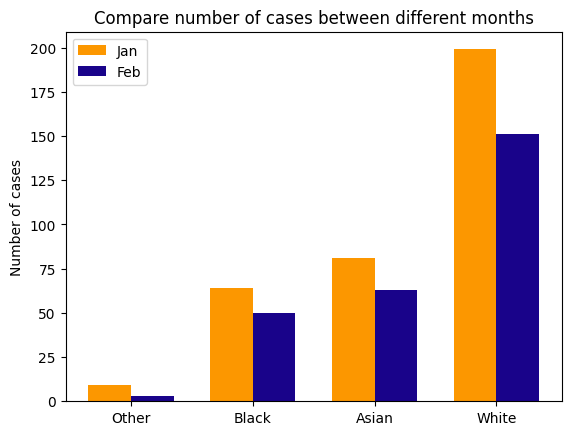

In [38]:
x = np.arange(len(compared_police_eth1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, compared_police_eth1['Type'], width, label='Jan',color = '#fc9700')
rects2 = ax.bar(x + width/2, compared_police_eth2['Type'], width, label='Feb',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different months')

ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])

ax.legend();

# Quiz 13

plot grouped barchart เปรียบเทียบจำนวน cases 3 เดือน ของแต่ละ เชื้อชาติ

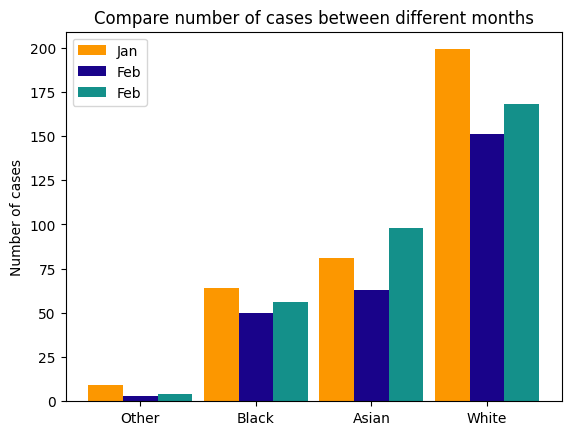

In [36]:
x = np.arange(len(compared_police_eth1))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, compared_police_eth1['Type'], width, label='Jan',color = '#fc9700')
rects2 = ax.bar(x, compared_police_eth2['Type'], width, label='Feb',color = '#19038a')
rects3 = ax.bar(x + width, compared_police_eth3['Type'], width, label='Feb',color = '#14908a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different months')

ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])

ax.legend();

# Tree map

In [39]:
!pip install squarify

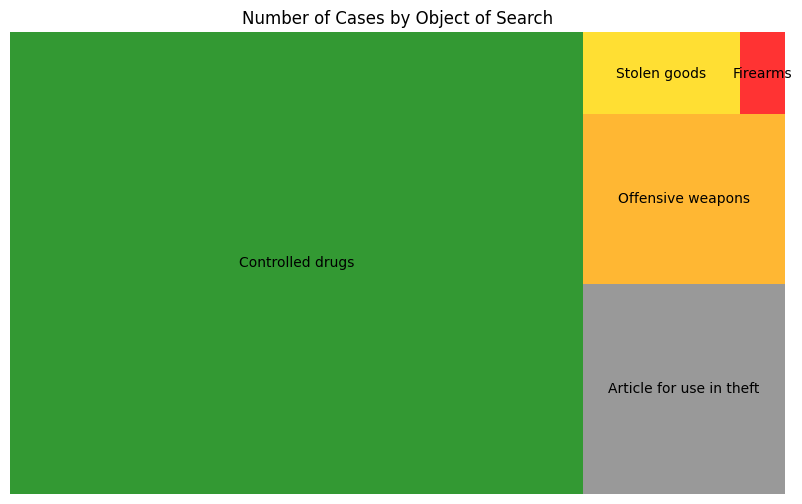

In [40]:
# prompt: plot treemap of the Object of search

import pandas as pd
import matplotlib.pyplot as plt


import squarify

# Assuming 'data' contains the DataFrame with 'Object of search' column
object_of_search_counts = data['Object of search'].value_counts()

# Define colors for each category
colors = ['green', 'gray', 'orange', 'gold', 'red']

# Create the treemap with specified colors
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
squarify.plot(sizes=object_of_search_counts.values, label=object_of_search_counts.index, alpha=.8, color=colors)
plt.title('Number of Cases by Object of Search')
plt.axis('off')
plt.show()

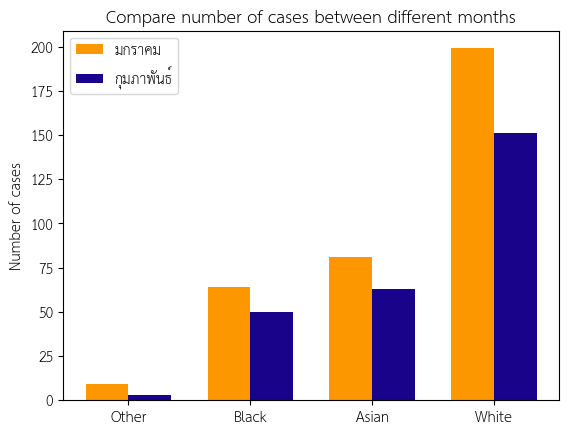

In [58]:
x = np.arange(len(compared_police_eth1))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, compared_police_eth1['Type'], width, label='มกราคม',color = '#fc9700')
rects2 = ax.bar(x + width/2, compared_police_eth2['Type'], width, label='กุมภาพันธ์',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of cases')
ax.set_title('Compare number of cases between different months')

ax.set_xticks(x)
ax.set_xticklabels(compared_police_eth1['Officer-defined ethnicity'])

ax.legend();

In [59]:
# prompt: replace word Budget in the Price Category with รุ่นเริ่มต้น

data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')


KeyError: 'Price Category'

In [44]:
data

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.413110,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.296600,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Person search,2025-01-31T21:24:00+00:00,False,NaN,52.134841,-0.483243,Female,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
383,Person search,2025-01-31T21:35:00+00:00,False,NaN,52.134841,-0.483243,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
384,Person search,2025-01-31T22:15:00+00:00,False,NaN,51.881800,-0.368669,Male,over 34,Other ethnic group - Not stated,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Community resolution,True,False
385,Person search,2025-01-31T23:23:00+00:00,False,NaN,51.878459,-0.422384,NaN,18-24,Asian/Asian British - Any other Asian background,Asian,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False


In [45]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดของแต่ละ region ด้วยคำสั้ง plt.bar

import matplotlib.pyplot as plt

# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.bar(region_sales.index, region_sales.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Show the plot
plt.show()


KeyError: 'Region'

In [46]:
region_sales

NameError: name 'region_sales' is not defined

In [47]:
region_sales.reset_index()['Region']

NameError: name 'region_sales' is not defined

In [48]:
region_sales.reset_index().Region

NameError: name 'region_sales' is not defined

In [49]:
region_sales.values

NameError: name 'region_sales' is not defined

In [50]:
region_sales.index

NameError: name 'region_sales' is not defined

In [51]:
# Group data by region and sum sales
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

KeyError: 'Region'

In [52]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import matplotlib.pyplot as plt
# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Show the plot
plt.show()


KeyError: 'Region'

## plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

In [53]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()


KeyError: 'Region'

การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [54]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [55]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [56]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()

KeyError: 'Region'

## Plot stacked barchart ด้วย matplotlib

In [57]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

KeyError: 'Region'

In [ ]:
region_brand_sales['BrandA'].values

In [ ]:
region_brand_sales.index

## plot ส่วนแรก

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width,
       bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width,
       bottom=region_brand_sales['BrandA'].values + region_brand_sales['BrandB'].values, label='BrandC',color = '#FF5733')


ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

# Grouped bar chart (เปรียบเทียบในกลุ่ม)

In [ ]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาด plot ให้เล็กลง 30%

import matplotlib.pyplot as plt
# Group data by region, year, and price category, then sum sales
region_year_price_category_sales = data[data['Year'] == 2021].groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_year_price_category_sales.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()


## Plot grouped bar chart ของ หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

In [ ]:
data_india = data_india.dropna(subset=['Rating','Duration','Genre'])
data_india = data_india[['Rating','Duration','Genre']]
data_india

In [ ]:
# prompt: แปลงค่าใน column duration เป็น int โดยลบ min ออกและ เปลี่ยนชนิดข้อมูลเป็น integer

# Remove " min" from the 'Duration' column and convert to integer
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)


In [ ]:
data_india.describe()

In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama, action, romance, horror, musical

# Create a dictionary to store the tables
genre_tables = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate through the genres and create separate tables
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'] == genre].copy()

# Access the tables using the genre as the key
# Example:
# drama_table = genre_tables['Drama']


In [ ]:
all_table = pd.concat(genre_tables.values())
all_table

In [ ]:
# prompt: แบ่ง duration ออกเป็น short, medium, long โดย short สั้นกว่า 60 medium 60-90 ที่เหลือ เป็น long

# Function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column
all_table['Duration Category'] = all_table['Duration'].apply(categorize_duration)
all_table

In [ ]:
all_table.groupby(['Genre','Duration Category'])['Rating'].mean()

In [ ]:
india_bar_data = all_table.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()

In [ ]:
india_bar_data

In [ ]:
ax = india_bar_data.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, facecolor = 'violet', alpha = 0.75)

## ทดสอบกับข้อมูลหนังอินเดีย

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

In [ ]:
len(set(data_india.dropna(subset=['Genre'])['Genre']))

In [ ]:
plt.hist(data_india.dropna(subset=['Genre'])['Genre'],bins = len(set(data_india.dropna(subset=['Genre'])['Genre'])))
plt.xticks(rotation='vertical');

In [ ]:
data_india['Genre'].str.split(',', expand=True)

In [ ]:
data_india = data_india.dropna(subset=['Genre'])

In [ ]:
# prompt: split value in column genre by ',' and make more column for each of those

import pandas as pd
# Split the 'Genre' column by ',' and create new columns
genre_split = data_india['Genre'].str.split(',', expand=True)

# Rename the new columns
genre_split.columns = ['Genre1', 'Genre2', 'Genre3']

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([data_india, genre_split], axis=1)

# Display the updated DataFrame
data_india.head()


In [ ]:
# prompt: delete space in the value in Genre1 Genre2 Genre3

for col in ['Genre1', 'Genre2', 'Genre3']:
  data_india[col] = data_india[col].str.strip() if data_india[col].dtype == 'object' else data_india[col]


In [ ]:
allGenre = list(data_india['Genre1'])+list(data_india['Genre2'])+list(data_india['Genre3'])

In [ ]:
len(set(allGenre))

In [ ]:
allGenre[-20:]

In [ ]:
allGenre[:13]

In [ ]:
# prompt: delete all None from the allGenre list

allGenre = [x for x in allGenre if x is not None]


In [ ]:
plt.hist(allGenre,bins = len(set(allGenre)))
plt.xticks(rotation='vertical');

# Quiz15 หาพระเอก-นางเอก ที่มักจะแสดงคู่กัน ด้วย Histogram (พระเอก actor1, นางเอก actor2)

## Tree map

In [ ]:
# prompt: plot treemap of the genre

import pandas as pd
import matplotlib.pyplot as plt
!pip install squarify

import squarify

# Assuming 'allGenre' contains the list of genres you want to plot
genre_counts = pd.Series(allGenre).value_counts()

# Create the treemap
squarify.plot(sizes=genre_counts.values, label=genre_counts.index, alpha=.8 )
plt.axis('off')
plt.show()


## Radar Chart

In [60]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [61]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

,client_id,cheese,beer,chicken,bread,coffee
0,c1,2,2,5,4,2
1,c2,5,1,3,3,3
2,c3,4,3,3,2,5
3,c4,3,5,4,1,3


In [62]:
categories = list(df.columns[1:])
categories

['cheese', 'beer', 'chicken', 'bread', 'coffee']

In [68]:
values = df.iloc[:,1:].mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

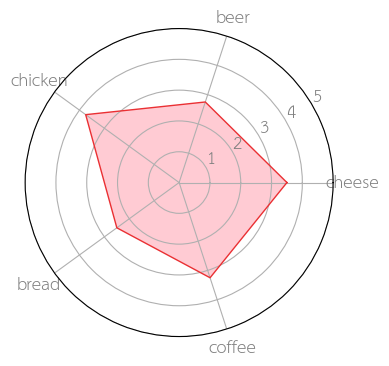

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.7) #พื้นที่

In [82]:
df.loc[0]

,0
client_id,c1
cheese,2
beer,2
chicken,5
bread,4
coffee,2


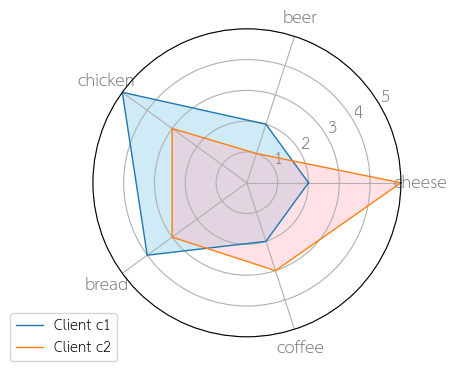

In [83]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

เปรียบเทียบสองเมืองกับประเภทอาฉญา

##Quit14

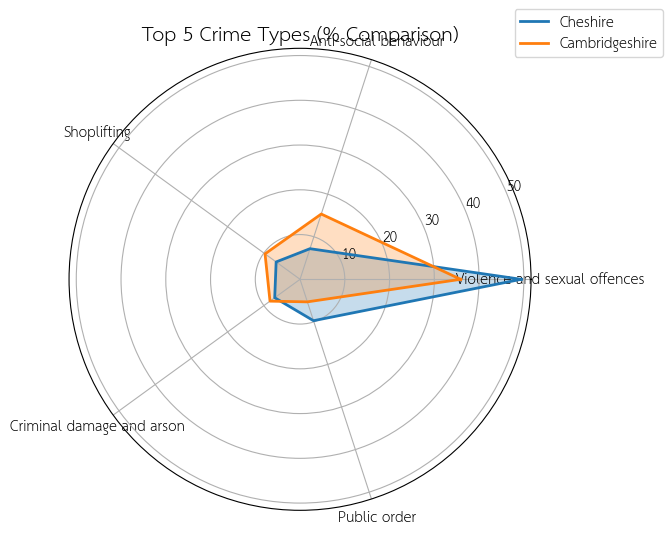

Top 5 Crime Types (% Comparison)
                     Crime Type  Cheshire (%)  Cambridgeshire (%)
0  Violence and sexual offences         49.41               35.89
1         Anti-social behaviour          7.19               15.33
2                   Shoplifting          6.60                9.67
3     Criminal damage and arson          7.00                8.30
4                  Public order          9.72                5.30


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# โหลดไฟล์สองเมือง
df_cheshire = pd.read_csv("/content/drive/MyDrive/Data/2025-01/2025-01-cheshire-street.csv")
df_cambridge = pd.read_csv("/content/drive/MyDrive/Data/2025-01/2025-01-cambridgeshire-street.csv")

# นับจำนวนอาชญากรรมแต่ละประเภทในแต่ละเมือง
crime_cheshire = df_cheshire['Crime type'].value_counts(normalize=True) * 100
crime_cambridge = df_cambridge['Crime type'].value_counts(normalize=True) * 100

# รวม crime type ที่มีในทั้งสองเมือง
crime_total = (crime_cheshire.add(crime_cambridge, fill_value=0)).sort_values(ascending=False)

# เลือก top 5 crime type
top5_crimes = crime_total.head(5).index

# เตรียมข้อมูลสำหรับ radar chart (%)
data_cheshire = [crime_cheshire.get(c, 0) for c in top5_crimes]
data_cambridge = [crime_cambridge.get(c, 0) for c in top5_crimes]

# ปิดวงเชื่อมต่อ
data_cheshire += data_cheshire[:1]
data_cambridge += data_cambridge[:1]

# มุมสำหรับ plot
angles = np.linspace(0, 2*np.pi, len(top5_crimes), endpoint=False).tolist()
angles += angles[:1]

# --- Radar Chart ---
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, data_cheshire, linewidth=2, label="Cheshire")
ax.fill(angles, data_cheshire, alpha=0.25)

ax.plot(angles, data_cambridge, linewidth=2, label="Cambridgeshire")
ax.fill(angles, data_cambridge, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(top5_crimes, fontsize=10)
ax.set_title("Top 5 Crime Types (% Comparison)", fontsize=14)
ax.legend(loc="upper right", bbox_to_anchor=(1.3,1.1))
plt.show()

# --- ตารางสรุปเป็น % ---
summary_df = pd.DataFrame({
    "Crime Type": top5_crimes,
    "Cheshire (%)": [crime_cheshire.get(c, 0) for c in top5_crimes],
    "Cambridgeshire (%)": [crime_cambridge.get(c, 0) for c in top5_crimes]
})

print("Top 5 Crime Types (% Comparison)")
print(summary_df.round(2))

# HW9 present radar chart data india